# **Initial Exploration**


Initial Exploration refers to the preliminary phase of data analysis where the main objective is to understand the basic characteristics of the dataset before delving into deeper analysis. It involves several steps to gain insights into the data and identify any potential issues that may need to be addressed. Here's a breakdown of the steps involved in Initial Exploration:

1. **Checking Shape**: This step involves examining the dimensions of the dataset, i.e., the number of rows and columns. Understanding the shape of the dataset gives an initial idea of its size and structure.

2. **Checking Data Types**: Data types provide information about the nature of variables in the dataset (e.g., numeric, categorical). Checking data types helps in understanding how the data is stored and how it can be manipulated for analysis.

3. **Summary Statistics**: Summary statistics provide a summary of the main characteristics of the dataset, such as measures of central tendency (e.g., mean, median), dispersion (e.g., standard deviation), and distributional shape. This step helps in getting a quick overview of the data's distribution and variability.

4. **Null Values Checking**: Identifying missing values (null values) is essential for data cleaning and preprocessing. Checking for null values helps in understanding the extent of missing data in the dataset and determining how to handle them in subsequent analysis.

5. **Bad Data**

Overall, Initial Exploration sets the stage for further analysis by providing an overview of the dataset's structure, content, and quality. It helps analysts to make informed decisions about data preprocessing, feature engineering, and modeling strategies based on the characteristics and limitations of the dataset.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mohithsairamreddy/salary-data

Dataset URL: https://www.kaggle.com/datasets/mohithsairamreddy/salary-data
License(s): Community Data License Agreement - Sharing - Version 1.0
  0% 0.00/16.6k [00:00<?, ?B/s]
100% 16.6k/16.6k [00:00<00:00, 25.1MB/s]


In [ ]:
!unzip  /content/salary-data.zip
!ls

Archive:  /content/salary-data.zip
  inflating: Salary_Data.csv         
kaggle.json  Salary_Data.csv  salary-data.zip  sample_data


## **Loading the Salary Data**

Dataset located at https://www.kaggle.com/datasets/mohithsairamreddy/salary-data.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
salary_df= pd.read_csv('/content/Salary_Data.csv')

salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# **Checking Shape of the dataset**

In Python's pandas library, a DataFrame is a two-dimensional labeled data structure with columns of potentially different types. The shape attribute of a DataFrame provides information about its dimensions, specifically the number of rows and columns it contains.

When you access the shape attribute of a DataFrame like salary_df.shape, it returns a tuple with two values. The first value represents the number of rows, while the second value represents the number of columns.

In [ ]:
# Viewing the shape of the DataFrame
print("Shape of the DataFrame:")
print(salary_df.shape)

Shape of the DataFrame:
(6704, 6)


# **Checking Data Types**

The `info()` method in pandas provides a concise summary of the DataFrame's metadata. Here's a more detailed explanation:

When you call `salary_df.info()`, it prints a summary that includes the following information for each column in the DataFrame:

1. The column name.
2. The count of non-null values in that column.
3. The data type of the values in that column.
4. A summary of the memory usage.

Additionally, at the end of the summary, it provides:

1. The total number of columns (under "Columns").
2. The number of entries in the DataFrame (under "Index").
3. Memory usage information.

This summary is very useful for gaining a quick understanding of the DataFrame's structure and content. It allows you to identify:

- Missing values: If the count of non-null values is less than the total number of entries, it indicates missing data.
- Data types: Knowing the data types helps you understand how the data is stored and processed.
- Memory usage: Provides insight into the memory footprint of the DataFrame.

By using `info()`, you can efficiently identify data quality issues, understand the types of operations you can perform on the DataFrame, and optimize memory usage if necessary.

In [ ]:
# Using info() to get a concise summary of the DataFrame
print("DataFrame information:")
salary_df.info()

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In pandas, the `dtypes` attribute of a DataFrame provides information about the data types of each column. When you call `salary_df.dtypes`, you retrieve a Series object where the index contains the column names, and the values represent the data types of the corresponding columns.

Data types in pandas can include:

1. **int64, float64**: These data types represent integer and floating-point numbers, respectively. They are typically used for numerical data.

2. **object**: This data type usually represents string values or a mix of data types within a column. It's a catch-all for columns with heterogeneous data.

3. **datetime64**: This data type is used for columns containing date and time values.

4. **category**: This data type is used for categorical variables with a fixed number of unique values. It's memory-efficient and can improve performance in certain operations.

5. **bool**: This data type represents boolean values, either True or False.

Inspecting data types with `dtypes` is crucial for several reasons:

- **Data Integrity**: It helps ensure that each column contains the expected data type, preventing unexpected behavior during analysis or processing.

- **Memory Usage**: Understanding data types aids in optimizing memory usage. For instance, using more memory-efficient data types can significantly reduce the memory footprint of large datasets.

- **Data Processing**: Different data types support different operations. For example, you can perform arithmetic operations on numerical data but not on categorical data.

By examining data types with `dtypes`, you gain insights into the structure of your DataFrame, allowing you to make informed decisions during data manipulation, analysis, and visualization.

In [ ]:
# Checking data types of columns in the DataFrame
print("Data types of columns in the DataFrame:")
salary_df.dtypes

Data types of columns in the DataFrame:


Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [ ]:
# Counting numerical columns
numerical_columns = salary_df.select_dtypes(include=['int64', 'float64']).columns
num_numerical_columns = len(numerical_columns)

# Counting categorical columns
categorical_columns = salary_df.select_dtypes(include=['object', 'category']).columns
num_categorical_columns = len(categorical_columns)

# Printing the counts
print("Number of numerical columns:", num_numerical_columns)
print("Number of categorical columns:", num_categorical_columns)


Number of numerical columns: 3
Number of categorical columns: 3


# **Summary Statistics**


The `describe()` method in pandas provides summary statistics for both numeric and categorical data, but the output differs depending on the data type of the columns. Here's how `describe()` works for numeric and categorical data:

### For Numeric Data:
For numeric columns, `describe()` computes the following statistics:

1. **Count**: The number of non-null values in each column.
2. **Mean**: The average value of each column.
3. **Standard Deviation**: A measure of the dispersion of values around the mean.
4. **Minimum**: The smallest value in each column.
5. **25th Percentile (Q1)**: The value below which 25% of the data falls.
6. **50th Percentile (Median or Q2)**: The median value.
7. **75th Percentile (Q3)**: The value below which 75% of the data falls.
8. **Maximum**: The largest value in each column.

### For Categorical Data:
For categorical columns, `describe()` provides the following statistics:

1. **Count**: The number of non-null values in each column.
2. **Unique**: The number of unique categories in each column.
3. **Top**: The most frequently occurring category.
4. **Frequency**: The frequency of the top category.

In [ ]:
# Checking summary statistics of numeric columns in the DataFrame
numeric_summary_statistics = salary_df.describe()
print("Summary statistics of numeric columns:")
numeric_summary_statistics

Summary statistics of numeric columns:


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


The `include='object'` parameter in the `describe()` method restricts the summary statistics computation to only the categorical columns of the DataFrame, enabling focused analysis on categorical data.

In [ ]:
# Checking summary statistics of categorical columns in the DataFrame
categorical_summary = salary_df.describe(include='object')
print("Summary statistics of categorical columns:")
categorical_summary

Summary statistics of categorical columns:


,Gender,Education Level,Job Title
count,6702,6701,6702
unique,3,7,193
top,Male,Bachelor's Degree,Software Engineer
freq,3674,2267,518


When you use `include='all'` as a parameter in the `describe()` method, it includes all columns, regardless of their data types, in the summary statistics computation. This means that both numeric and categorical columns will be considered, providing a comprehensive overview of the entire DataFrame's data.

In [ ]:
# Checking summary statistics of numeric columns in the DataFrame
all_summary_statistics = salary_df.describe(include='all')
print("Summary statistics of all columns:")
all_summary_statistics

Summary statistics of all columns:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,6702.000000,6702,6701,6702,6701.000000,6699.000000
unique,NaN,3,7,193,NaN,NaN
top,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN
freq,NaN,3674,2267,518,NaN,NaN
mean,33.620859,NaN,NaN,NaN,8.094687,115326.964771
std,7.614633,NaN,NaN,NaN,6.059003,52786.183911
min,21.000000,NaN,NaN,NaN,0.000000,350.000000
25%,28.000000,NaN,NaN,NaN,3.000000,70000.000000
50%,32.000000,NaN,NaN,NaN,7.000000,115000.000000
75%,38.000000,NaN,NaN,NaN,12.000000,160000.000000


# **Null Values Checking**

To check for null values in a DataFrame in Python using pandas, you can use the `isnull()` method, which returns a DataFrame of the same shape as the original DataFrame but with boolean values (`True` for null values and `False` otherwise). Then, you can use the `sum()` method to count the number of `True` values in each column, which corresponds to the number of null values. Here's how you can do it step by step:

1. **Using `isnull()`**:
   - Call `isnull()` on the DataFrame, e.g., `salary_df.isnull()`.
   - This generates a DataFrame with the same shape as `salary_df`, where each element is `True` if it's a null value (`NaN`) and `False` otherwise.

2. **Using `sum()`**:
   - Apply the `sum()` method on the DataFrame returned by `isnull()`, e.g., `salary_df.isnull().sum()`.
   - This calculates the sum along each column axis, resulting in a Series where the index represents column names and the values represent the count of null values in each column.

3. **Interpreting the Result**:
   - A higher count of null values in a column indicates more missing data.
   - If a column has a count of 0 null values, it means there are no missing values in that column.

4. **Further Analysis**:
   - After obtaining the count of null values, you can decide on appropriate strategies to handle them, such as imputation, deletion, or interpolation, depending on the nature of your data and analysis goals.



In [ ]:
# Count of null values in each column
null_counts = salary_df.isnull().sum()
print("Count of null values in each column:")
print(null_counts)


Count of null values in each column:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


To calculate the percentage of null values in each column of a DataFrame, you can follow these steps:

1. Calculate the count of null values in each column using the `isnull()` method followed by `sum()`.
2. Divide the count of null values in each column by the total number of rows in the DataFrame.
3. Multiply the result by 100 to obtain the percentage.



In [ ]:
# Percentage of null values in each column
total_rows = len(salary_df)
null_percentage = (salary_df.isnull().sum() / total_rows) * 100
print("Percentage of null values in each column:")
print(null_percentage)


Percentage of null values in each column:
Age                    0.029833
Gender                 0.029833
Education Level        0.044749
Job Title              0.029833
Years of Experience    0.044749
Salary                 0.074582
dtype: float64


# **Loading the House Price Competition Datasets**
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 92.4MB/s]


In [ ]:
!unzip /content/house-prices-advanced-regression-techniques.zip
!ls

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
data_description.txt				 Salary_Data.csv  sample_submission.csv
house-prices-advanced-regression-techniques.zip  salary-data.zip  test.csv
kaggle.json					 sample_data	  train.csv


In [ ]:
train_df= pd.read_csv('/content/train.csv')

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **All Initial Exploration in One Place**

In [ ]:
def describe_data(data):
    desc = pd.DataFrame({
        'type': data.dtypes,
        'count': data.count(),
        'nunique': data.nunique(),
        'unique%': data.nunique() / len(data) * 100,
        'null': data.isnull().sum(),
        'null%': data.isnull().sum() / len(data) * 100
    })

    desc = pd.concat([desc, data.describe().T.drop('count', axis=1)], axis=1)
    desc = desc.sort_values(by=['type', 'null%'])

    # Apply background gradient with Blues colormap
    styled_desc = desc.style.background_gradient(axis=0, cmap='Blues')

    return styled_desc

# Call the function to describe the data
styled_train_description = describe_data(train_df)

# Display styled description
styled_train_description


,type,count,nunique,unique%,null,null%,mean,std,min,25%,50%,75%,max
Id,int64,1460,1460,100.000000,0,0.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,int64,1460,15,1.027397,0,0.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotArea,int64,1460,1073,73.493151,0,0.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,int64,1460,10,0.684932,0,0.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,int64,1460,9,0.616438,0,0.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,int64,1460,112,7.671233,0,0.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,int64,1460,61,4.178082,0,0.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
BsmtFinSF1,int64,1460,637,43.630137,0,0.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000
BsmtFinSF2,int64,1460,144,9.863014,0,0.000000,46.549315,161.319273,0.000000,0.000000,0.000000,0.000000,1474.000000
BsmtUnfSF,int64,1460,780,53.424658,0,0.000000,567.240411,441.866955,0.000000,223.000000,477.500000,808.000000,2336.000000


# **Heatmap of NULL Values**

A heatmap is a graphical representation of data where the values of a matrix are represented as colors. It's a way of visualizing data in a 2D format using colors to represent the magnitude of the data values.

In a heatmap:

1. Each cell in a matrix is represented by a color, and the color intensity corresponds to the value of the data in that cell.
2. Typically, a color scale or colormap is used to map the data values to colors. For example, low values might be represented by lighter colors (e.g., shades of yellow), while high values might be represented by darker colors (e.g., shades of red).
3. Heatmaps are often used to visualize large datasets or matrices, as they provide a clear and intuitive representation of complex data patterns and relationships.

Heatmaps are commonly used in various fields such as data analysis, biology, finance, and geography. They can be used to visualize correlations between variables, identify clusters or patterns, analyze spatial data, and much more.

Overall, heatmaps are a powerful visualization tool for exploring and understanding data, as they provide a visually appealing and informative representation of data values.


A **heatmap of null values** is a graphical representation that visualizes the presence of missing or null values within a dataset. In this type of heatmap:

1. Each cell in the dataset is represented by a colored square.
2. If the value of the cell is null (i.e., missing), it is typically represented by a distinctive color, such as white or light gray.
3. If the value of the cell is not null, it may be represented by a different color or left blank, depending on the specific visualization.
4. The heatmap provides a visual summary of missing data patterns across the dataset, allowing for quick identification of areas with missing values.

Heatmaps of null values are commonly used in data preprocessing and exploratory data analysis to assess the completeness of a dataset. By visualizing the distribution and density of missing values, analysts can identify columns or rows with high rates of missing data, detect any patterns or clusters of missing values, and make informed decisions about how to handle missing data in subsequent analyses. This visualization helps ensure data quality and integrity throughout the data analysis process.

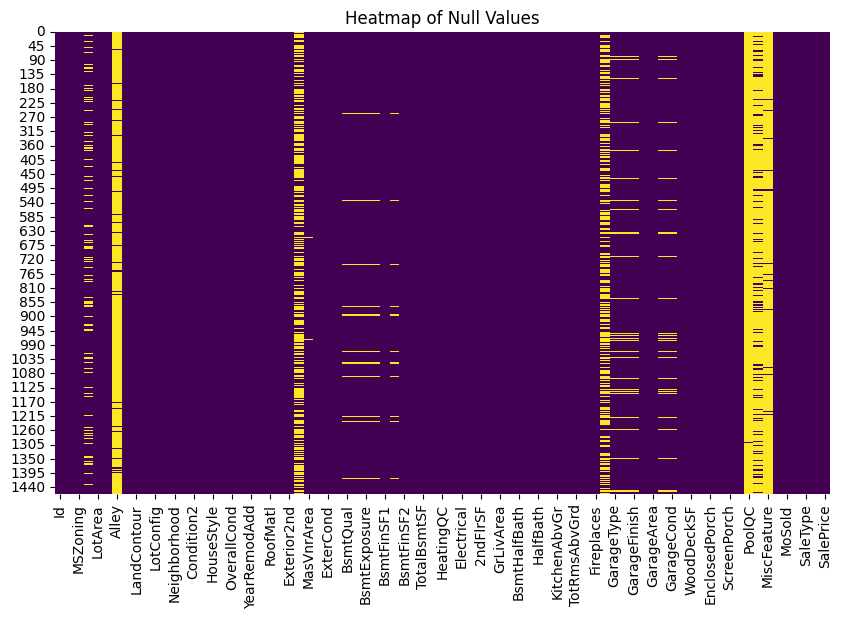

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for null values
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Null Values')
plt.show()


Let's break down the code step by step and explain each part:

1. **Importing Libraries**: The code begins by importing the necessary libraries:
   - `seaborn` (imported as `sns`): Seaborn is a data visualization library based on matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics.
   - `matplotlib.pyplot` (imported as `plt`): Matplotlib is a comprehensive plotting library in Python.

2. **Creating the Heatmap**:
   - `plt.figure(figsize=(10, 6))`: This line creates a new figure with a specified size of 10 inches in width and 6 inches in height. This ensures that the heatmap will be displayed in a clear and appropriate size.
   - `sns.heatmap(train_df.isnull(), cmap='viridis', cbar=False)`: This line creates the heatmap.
     - `train_df.isnull()` generates a DataFrame of boolean values, where `True` indicates a null value (`NaN`) and `False` indicates a non-null value.
     - `sns.heatmap()` is then used to create the heatmap, with the boolean DataFrame passed as the data to be visualized.
     - `cmap='viridis'` sets the colormap to 'viridis', which is a perceptually uniform colormap known for its good representation of data.
     - `cbar=False` removes the color bar from the heatmap, as it's not necessary for visualizing null values.

3. **Plotting Settings**:
   - `plt.title('Heatmap of Null Values')`: This line sets the title of the plot to 'Heatmap of Null Values'. Providing a descriptive title helps in understanding the purpose of the visualization.

4. **Displaying the Plot**:
   - `plt.show()`: Finally, this line displays the heatmap plot.

In summary, this code creates a heatmap visualization to display the null values (`NaN`) in the DataFrame `train_df`. The heatmap helps visualize the distribution and pattern of missing values, providing insights into the completeness of the dataset.